In [6]:
!nvidia-smi

Sun May  2 07:28:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |   2884MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
import zipfile
import shutil
from platform import python_version
import cv2
from google.colab import drive
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import pylab
from google.colab.patches import cv2_imshow
import csv
from sklearn.preprocessing import LabelEncoder

os.chdir("/content/drive/MyDrive/DATA")
mango_train = pd.read_csv('/content/drive/MyDrive/DATA/train.csv')
print(mango_train)

       image_id label
0     00002.jpg     C
1     00003.jpg     C
2     00004.jpg     B
3     00005.jpg     A
4     00007.jpg     A
...         ...   ...
6125  07681.jpg     B
6126  07682.jpg     C
6127  07683.jpg     A
6128  07684.jpg     C
6129  07685.jpg     A

[6130 rows x 2 columns]


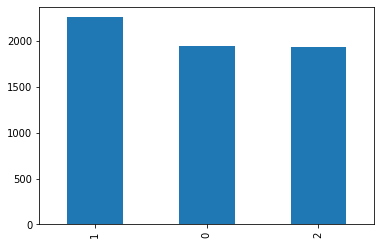

In [3]:
train_data = os.listdir('/content/drive/MyDrive/DATA/Train_Image')



train_data.sort(key=lambda x:int(x[0:5]))
del train_data[5266]
del train_data[5267]
del train_data[5268]
del train_data[5269]
del train_data[5270]
del train_data[5271]
del train_data[5272]
del train_data[5273]
del train_data[5274]
del train_data[5275]




train_target = mango_train['label']

train = pd.DataFrame({'picture_name':train_data})
train['label'] = train_target
train['path'] = train['picture_name']

labelencoder = LabelEncoder() 
train['label'] = labelencoder.fit_transform(train['label'])

train
train['label'].value_counts().plot.bar()

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 98, 98, 32)        896       
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 49, 49, 32)        0         
_________________________________________________________________
Convolution2 (Conv2D)        (None, 47, 47, 64)        18496     
_________________________________________________________________
Pooling2 (MaxPooling2D)      (None, 23, 23, 64)        0         
_________________________________________________________________
Convolution3 (Conv2D)        (None, 21, 21, 128)       73856     
_________________________________________________________________
Pooling3 (MaxPooling2D)      (None, 10, 10, 128)       0         
_________________________________________________________________
Flatten (Flatten)            (None, 12800)             0 

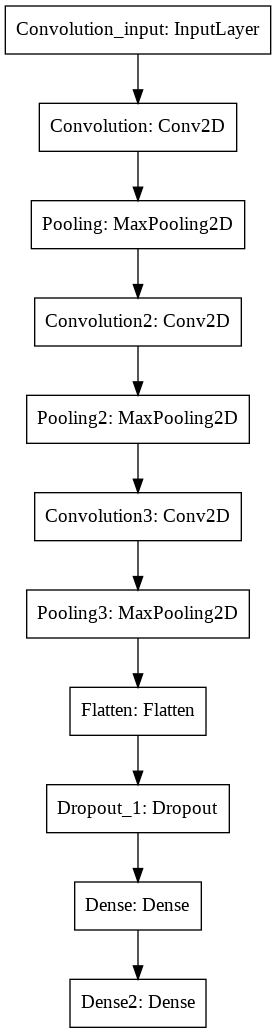

In [4]:
from keras import models
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  
from tensorflow.keras.optimizers import *

'''
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8
'''
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 32, activation='relu' , kernel_size = (3,3),input_shape = (100,100,3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Conv2D( 64, kernel_size = (3,3), name = 'Convolution2' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling2' ) )
CNN.add( Conv2D( 128, kernel_size = (3,3), name = 'Convolution3' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling3' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense(256, activation = 'relu', name = 'Dense' ) )
CNN.add( Dense( 3, activation = 'softmax', name = 'Dense2' ) )
CNN.compile( optimizer = Adam(),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'] )

CNN.summary()






CNN.save("chinese_mod")
plot_model(CNN, to_file='model.png')

In [9]:
total_train = train.shape[0]
batch_size = 100


train_datagen = ImageDataGenerator(
    rotation_range=0,          #隨機轉換角度次數
    rescale=1./255,             #正規化
    shear_range=0.1,            #斜拉
    zoom_range=0.2,             #放大縮小
    horizontal_flip=False,       #隨機翻轉
    width_shift_range=0,      #左右移動
    height_shift_range=0,     #上下移動
    validation_split=0.15
    )   




train_generator = train_datagen.flow_from_dataframe(
    train,'/content/drive/MyDrive/DATA/Train_Image',x_col ='path',y_col ='label',target_size = (100,100),class_mode = 'raw',
    batch_size = batch_size,
    #subset = 'training'
    
    )


"""
validation_generator = train_datagen.flow_from_dataframe(
    train,
    '/content/drive/MyDrive/DATA/Train_Image',
    x_col ='path',
    y_col = 'label',
    target_size = (100,100),
    class_mode = 'raw',
    batch_size = batch_size,
    subset = 'validation'
)
"""




epochs=20

CNN.fit(
    train_generator,
    epochs=epochs,
    #validation_data = validation_generator,
    #steps_per_epoch = train_generator.samples,
    #validation_steps = validation_generator.samples // batch_size,
    )


Found 6130 validated image filenames.
Epoch 1/20
62/62 [==============================] - 104s 2s/step - loss: 0.2535 - accuracy: 0.9036
Epoch 2/20
62/62 [==============================] - 104s 2s/step - loss: 0.2438 - accuracy: 0.9054
Epoch 3/20
62/62 [==============================] - 104s 2s/step - loss: 0.2256 - accuracy: 0.9088
Epoch 4/20
62/62 [==============================] - 104s 2s/step - loss: 0.2373 - accuracy: 0.9055
Epoch 5/20
62/62 [==============================] - 104s 2s/step - loss: 0.2212 - accuracy: 0.9157
Epoch 6/20
62/62 [==============================] - 106s 2s/step - loss: 0.1932 - accuracy: 0.9248
Epoch 7/20
62/62 [==============================] - 106s 2s/step - loss: 0.1988 - accuracy: 0.9223
Epoch 8/20
62/62 [==============================] - 105s 2s/step - loss: 0.2005 - accuracy: 0.9248
Epoch 9/20
62/62 [==============================] - 104s 2s/step - loss: 0.1907 - accuracy: 0.9272
Epoch 10/20
62/62 [==============================] - 105s 2s/step - los

預測分類

In [24]:
mango_test = pd.read_csv('/content/drive/MyDrive/DATA/Test.csv')

test_data = os.listdir('/content/drive/MyDrive/DATA/Test_Image')



test_data.sort(key=lambda x:int(x[0:5]))
"""
del train_data[5266]
del train_data[5267]
del train_data[5268]
del train_data[5269]
del train_data[5270]
del train_data[5271]
del train_data[5272]
del train_data[5273]
del train_data[5274]
del train_data[5275]
"""



test_target = mango_test['label']

test = pd.DataFrame({'picture_name':test_data})
test['label'] = test_target
test['path'] = test['picture_name']

labelencoder = LabelEncoder() 
test['label'] = labelencoder.fit_transform(test['label'])

test


,picture_name,label,path
0,07686.jpg,2,07686.jpg
1,07687.jpg,1,07687.jpg
2,07688.jpg,2,07688.jpg
3,07689.jpg,0,07689.jpg
4,07690.jpg,0,07690.jpg
...,...,...,...
245,07995.jpg,2,07995.jpg
246,07996.jpg,0,07996.jpg
247,07998.jpg,0,07998.jpg
248,07999.jpg,0,07999.jpg


In [48]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test,
    '/content/drive/MyDrive/DATA/Test_Image',
    x_col ='path',
    y_col = None,
    target_size = (100,100),
    class_mode = None,
    batch_size = 1,
    shuffle=False
    )
test_predict = CNN.predict(test_generator) 
test['predict'] = np.argmax(test_predict, axis = 1).astype('str')
test

Found 250 validated image filenames.


,picture_name,label,path,predict
0,07686.jpg,2,07686.jpg,2
1,07687.jpg,1,07687.jpg,1
2,07688.jpg,2,07688.jpg,0
3,07689.jpg,0,07689.jpg,0
4,07690.jpg,0,07690.jpg,0
...,...,...,...,...
245,07995.jpg,2,07995.jpg,0
246,07996.jpg,0,07996.jpg,0
247,07998.jpg,0,07998.jpg,0
248,07999.jpg,0,07999.jpg,0


In [49]:
from sklearn import metrics 
test_predict = np.argmax(test_predict, axis = 1)

test_target = test['label']


print(test_predict)
print(metrics.confusion_matrix(test_target, test_predict, labels=[0, 1])) 
print(metrics.classification_report(test_target, test_predict)) 

[2 1 0 0 0 1 0 0 2 0 1 1 0 1 1 1 2 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 1 0 1 1 1
 1 2 0 2 2 0 1 2 0 1 0 0 1 2 0 2 0 2 2 2 1 0 1 0 0 0 1 2 2 1 0 2 0 2 0 0 0
 2 0 0 1 0 2 0 0 1 0 0 2 2 2 2 0 2 2 1 0 2 0 0 1 2 1 1 0 0 0 2 1 0 2 2 2 1
 0 0 2 2 0 1 1 2 0 2 2 1 0 2 1 1 2 0 2 2 2 2 2 0 0 2 0 2 2 0 0 0 0 1 2 2 0
 2 2 2 1 2 2 1 1 1 0 0 0 1 2 2 2 1 0 2 0 1 0 1 2 0 2 1 1 0 2 1 1 1 0 2 2 0
 0 0 1 1 1 2 1 2 2 1 2 1 1 2 2 0 0 0 1 1 2 2 0 0 0 2 0 0 0 2 0 1 2 0 1 2 0
 2 1 1 0 2 2 1 0 0 1 0 0 1 2 2 0 0 2 0 2 0 0 2 0 0 0 0 2]
[[71  8]
 [24 54]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        84
           1       0.81      0.56      0.66        96
           2       0.73      0.89      0.80        70

    accuracy                           0.75       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.76      0.75      0.74       250

